# Apoe and MD without csf in Amyloid staging dataset


In [6]:
%run /home/grg/git/alfa/nilearn-helper.py
import sys
import pandas as pd
sys.path.append('/home/grg/git/alfa/')
import multireg_spm12 as mreg
reload(mreg)
%matplotlib inline

In [7]:
excel_fp = '/home/grg/SPM/2018/amylstaging_MDwocsf.xls'

analysis_name, ext = osp.splitext(osp.split(excel_fp)[1])
paramtype = analysis_name.split('_')[1]
analysis_wd = osp.join(osp.dirname(excel_fp), analysis_name)
spm = glob(osp.join(analysis_wd, 'estimatecontrasts/SPM.mat'))
#aal_fp = '/usr/local/MATLAB/R2014a/toolbox/spm12/toolbox/aal/ROI_MNI_V5.nii'
mask_fp = '/home/grg/spm/MNI_T1_brain_wo_csf.nii'
print 'Found SPM files:', spm

Found SPM files: ['/home/grg/SPM/2018/amylstaging_MDwocsf/estimatecontrasts/SPM.mat']


In [8]:
print 'Reading', excel_fp, 'looking up column', paramtype, '...'
a = mreg.generic_version(excel_fp, analysis_wd, mask_fp, analysis_name)
n1 = a.get_node('modeldesign')
n3 = a.get_node('estimatecontrasts')
print '# of scans included in the analysis:', len(n1.inputs.in_files)
display_html(pd.DataFrame([e for e in n3.inputs.contrasts], 
             columns=['contrast name', 'contrast type', 'covariate names', 'covariate weights']))

Reading /home/grg/SPM/2018/amylstaging_MDwocsf.xls looking up column MDwocsf ...
Analysis name: amylstaging_MDwocsf
First column: images
Columns in the model: [u'age', u'gender', u'NC', u'HT', u'HO']
Non-carriers / Heterozygotes / Homozygotes detected
Effect of Gender
Effect of Linear age
Analysis name: amylstaging_MDwocsf
Scans (107): [u'/home/grg/data/AmylStaging/dartel_final/spm/MD_wo_csf/10019_MD_wo_csf_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD_wo_csf/10044_MD_wo_csf_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD_wo_csf/10065_MD_wo_csf_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD_wo_csf/10070_MD_wo_csf_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD_wo_csf/10137_MD_wo_csf_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD_wo_csf/10162_MD_wo_csf_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD_wo_csf/10200_MD_wo_csf_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD_wo_csf/10225_MD_wo_csf_s.nii', u'/home/grg/data/Amyl

,contrast name,contrast type,covariate names,covariate weights
0,HO>HT,T,"[HO, HT]","[1.0, -1.0]"
1,HO>NC,T,"[HO, NC]","[1.0, -1.0]"
2,HT>NC,T,"[HT, NC]","[1.0, -1.0]"
3,Effect Gender,T,[gender],[1.0]
4,Effect Linear age,T,[age],[1.0]


/home/grg/SPM/2018/amylstaging_MDwocsf/estimatecontrasts/spmT_0001.nii T


/home/grg/jupyter/local/lib/python2.7/site-packages/nilearn/plotting/displays.py:656: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


Saving to... /tmp/tmpZXe3RT.png
/home/grg/SPM/2018/amylstaging_MDwocsf/estimatecontrasts/spmT_0002.nii T
Saving to... /tmp/tmprOv0uQ.png
/home/grg/SPM/2018/amylstaging_MDwocsf/estimatecontrasts/spmT_0003.nii T
Saving to... /tmp/tmpXPOpwV.png
/home/grg/SPM/2018/amylstaging_MDwocsf/estimatecontrasts/spmT_0004.nii T
Saving to... /tmp/tmpLJ_azk.png
/home/grg/SPM/2018/amylstaging_MDwocsf/estimatecontrasts/spmT_0005.nii T
Saving to... /tmp/tmpz36kDE.png


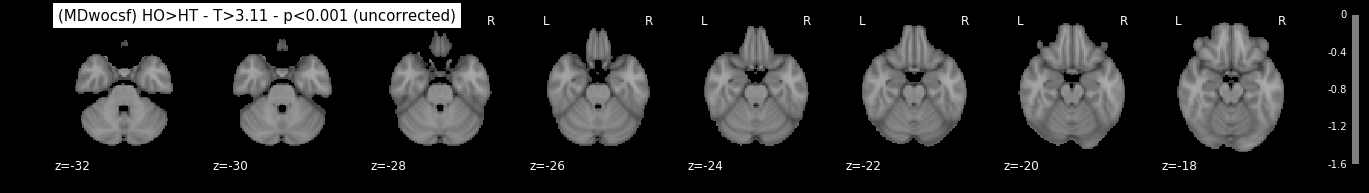

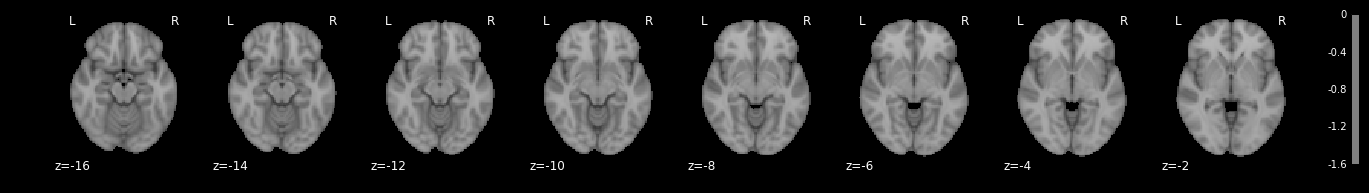

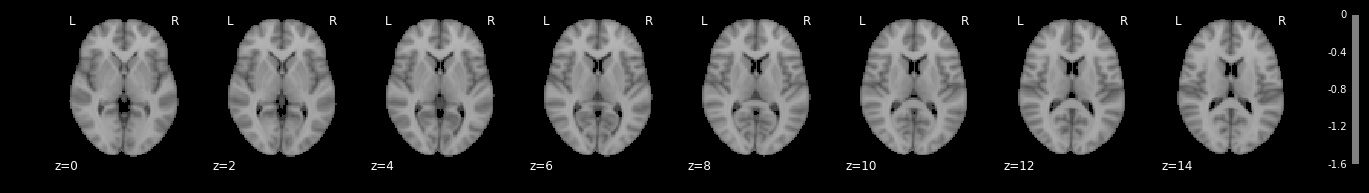

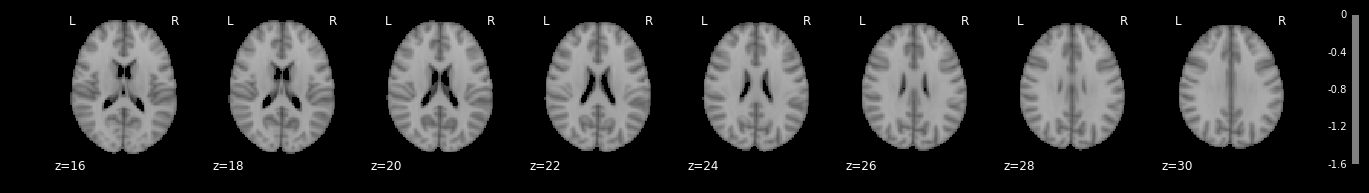

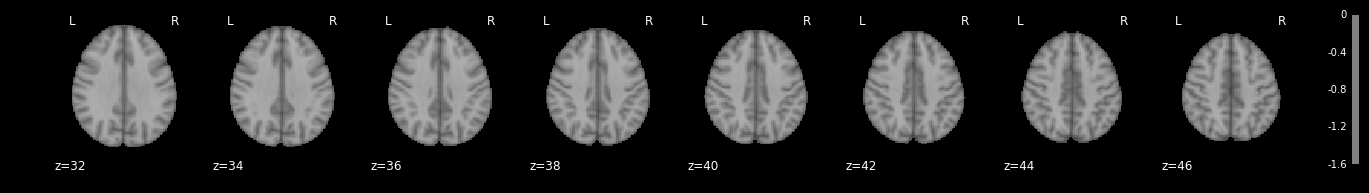

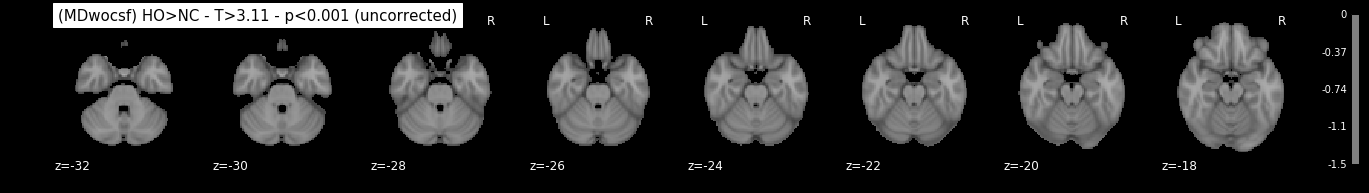

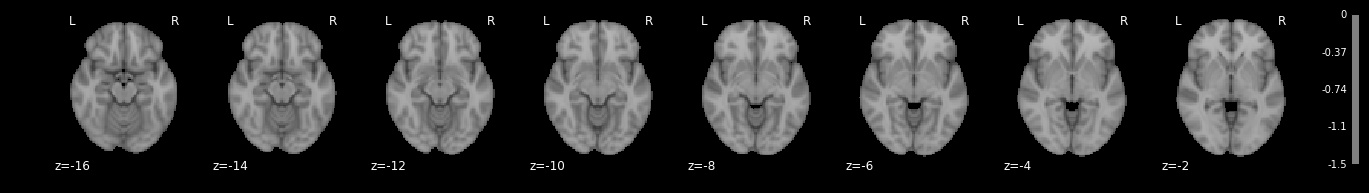

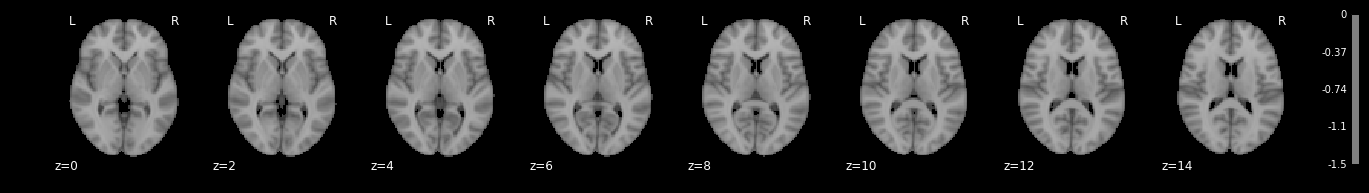

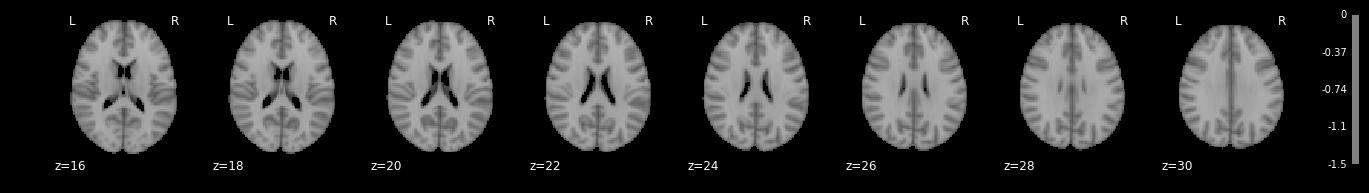

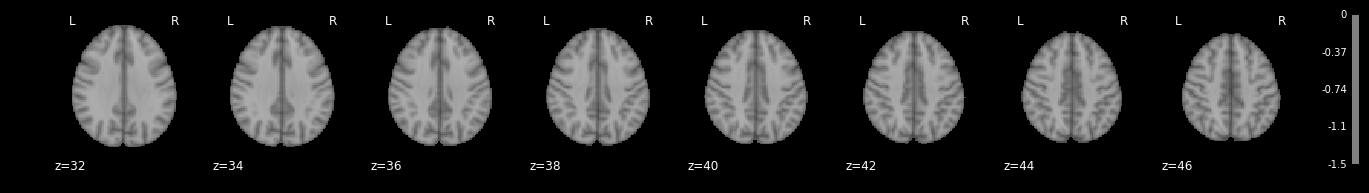

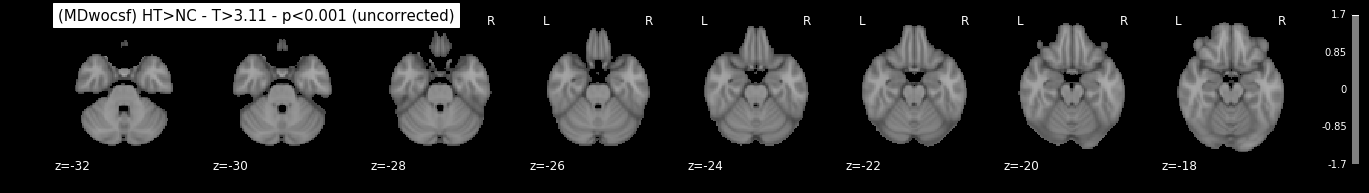

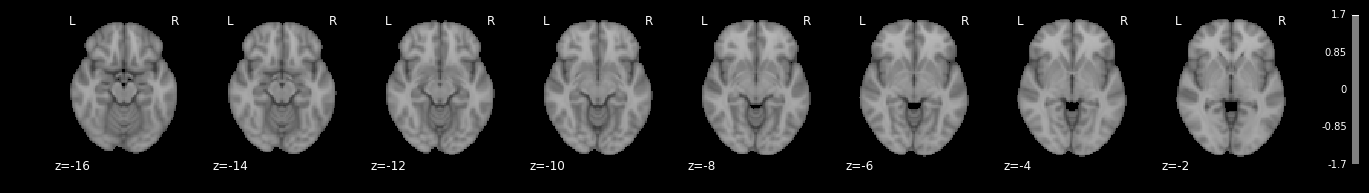

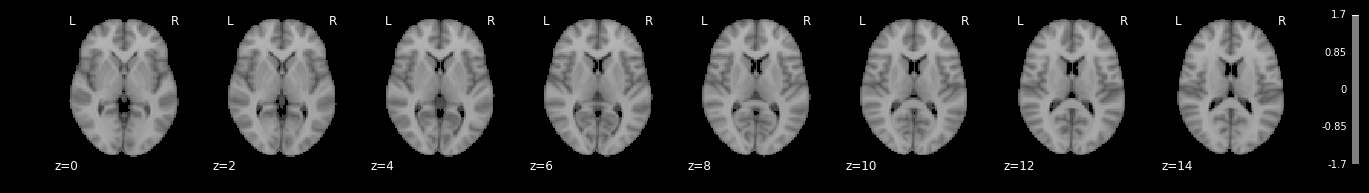

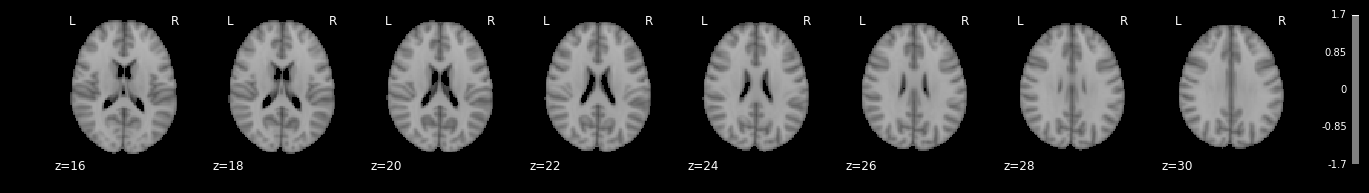

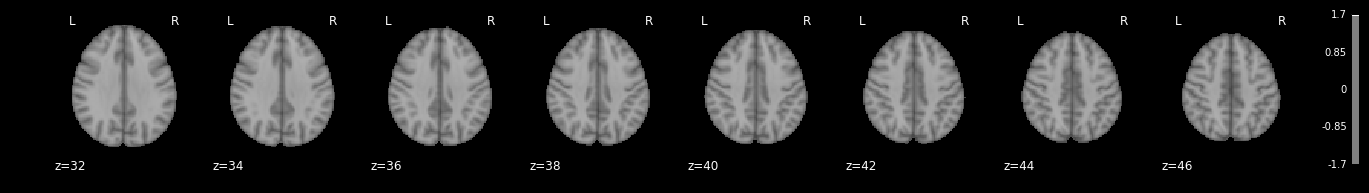

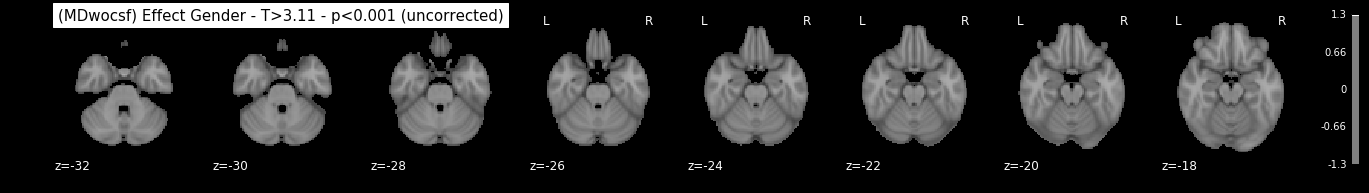

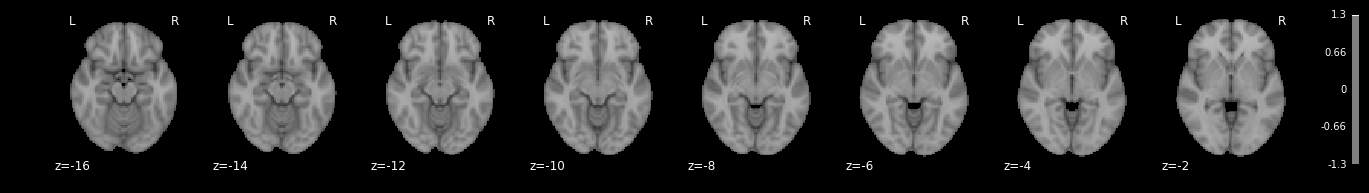

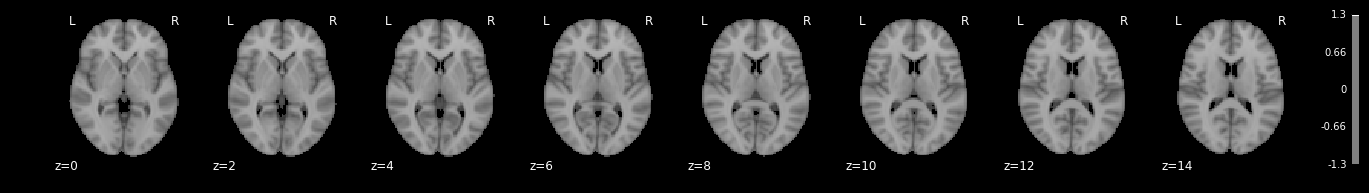

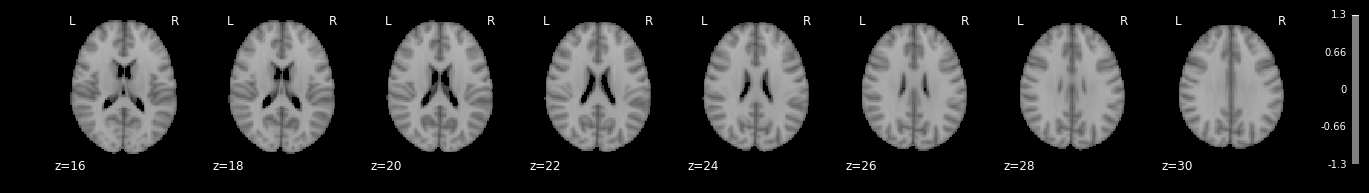

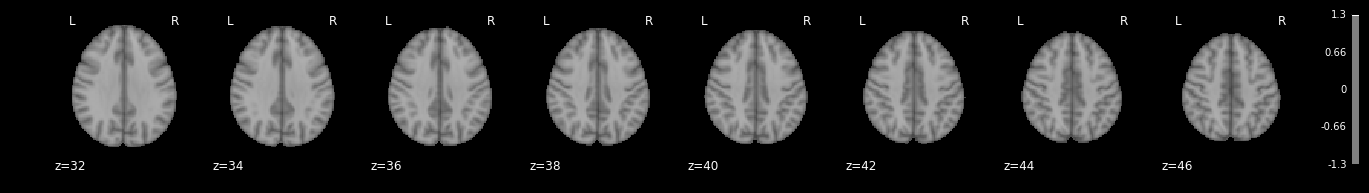

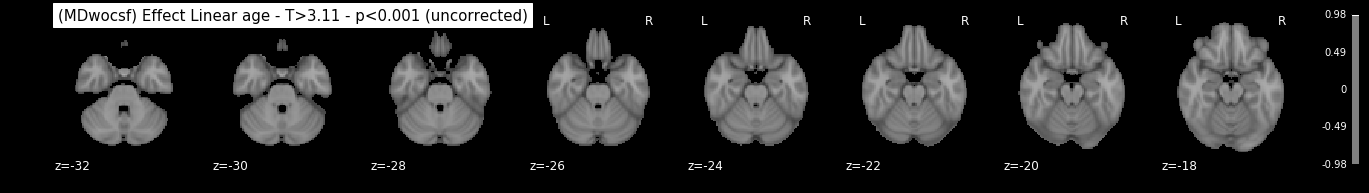

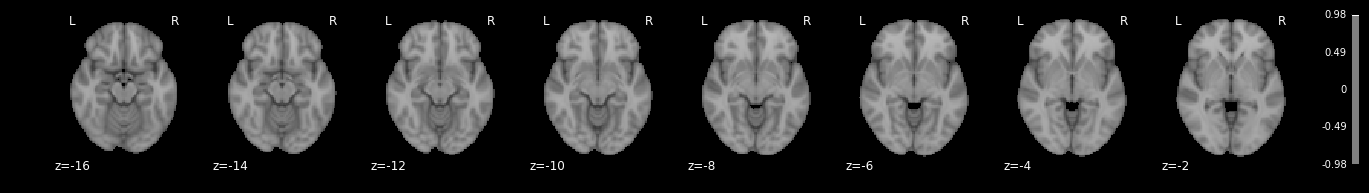

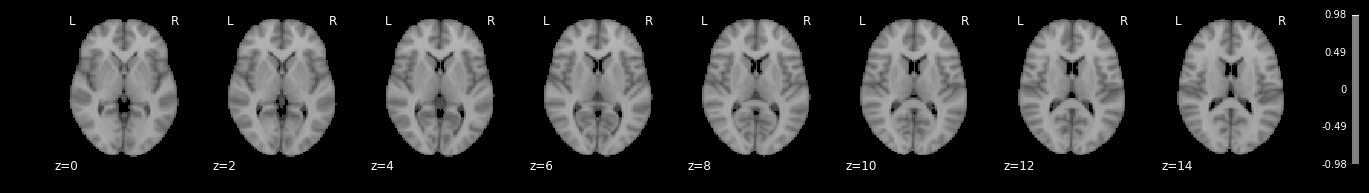

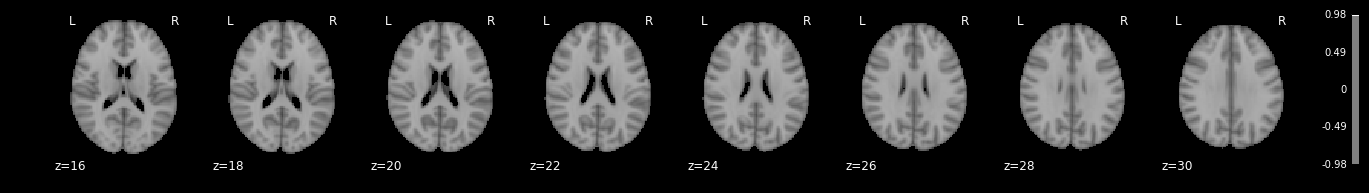

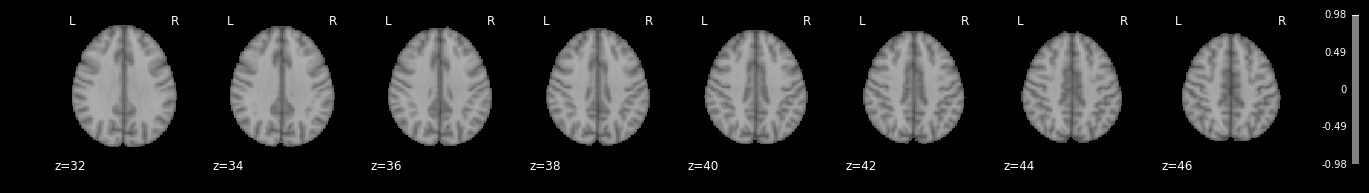

In [9]:
sections = sections_allcontrasts(analysis_wd, paramtype, axis='z', mode='uncorrected')

In [10]:
spm_mat_file = '/tmp/analysis_amylstaging/ALFA_data_staging/estimatecontrasts/SPM.mat'
out = pyAAL.pyAAL(spm_mat_file, 2, k=10, mode=2)
pyAAL.to_dataframe(out)

AssertionError: 